# 🏁 Wrap-up quiz

**This quiz requires some programming to be answered.**

Open the dataset `blood_transfusion.csv` with the following command:

In [1]:

import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]


`blood_transfusion` is a pandas dataframe. The column "Class" contains the
target variable.

# Question 1
Select the correct answers from the following proposals.

- a) The problem to be solved is a regression problem
- b) The problem to be solved is a binary classification problem
  (exactly 2 possible classes)
- c) The problem to be solved is a multiclass classification problem
  (more than 2 possible classes)
- d) The proportions of the class counts are imbalanced: some classes have more
  than twice as many rows than others)

_Select several answers_

Hint: `target.unique()`, and `target.value_counts()` are methods
that are helpful to answer to this question.


In [2]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

# Question 2
Using a
[`sklearn.dummy.DummyClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
and the strategy `"most_frequent"`, what is the average of the accuracy scores
obtained by performing a 10-fold cross-validation?

- a) ~25%
- b) ~50%
- c) ~75%

_Select a single answer_

Hint: You can check the documentation of `sklearn.model_selection.cross_val_score`
[here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
and `sklearn.model_selection.cross_validate`
[here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).


In [5]:
from sklearn.dummy import DummyClassifier

dumm = DummyClassifier()
dumm.fit(data, target)
accuracy = dumm.score(data, target)
print(f"Accuracy of logistic regression: {accuracy:.3f}")

import pandas as pd
from sklearn.model_selection import cross_val_score
cross_val_score(dumm, data, target, cv=10)

Accuracy of logistic regression: 0.762


array([0.76      , 0.76      , 0.76      , 0.76      , 0.76      ,
       0.76      , 0.76      , 0.76      , 0.77027027, 0.77027027])

# Question 3
Repeat the previous experiment but compute the balanced accuracy instead of
the accuracy score. Pass `scoring="balanced_accuracy"` when calling
`cross_validate` or `cross_val_score` functions?

- a) ~25%
- b) ~50%
- c) ~75%

_Select a single answer_


In [6]:
from sklearn.dummy import DummyClassifier

dumm = DummyClassifier()


import pandas as pd
from sklearn.model_selection import cross_val_score

cross_val_score(dumm, data, target, cv=10, scoring='balanced_accuracy')

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

# Question 4

We will use a
[`sklearn.neighbors.KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
for the remainder of this quiz.

Why is it relevant to add a preprocessing step to scale the data using a
`StandardScaler` when working with a `KNearestNeighborsClassifier`?

- a) faster to compute the list of neighbors on scaled data
- b) k-nearest neighbors is based on computing some distances. Features need
  to be normalized to contribute approximately equally to the distance
  computation.
- c) This is irrelevant. One could use k-nearest neighbors without normalizing
  the dataset and get a very similar cross-validation score.

_Select a single answer_

# Question 5

Create a scikit-learn pipeline (using
[`sklearn.pipeline.make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html))
where a `StandardScaler` will be used to scale the data followed by a
`KNeighborsClassifier`. Use the default hyperparameters.

Inspect the parameters of the created pipeline. What is the value of K, the
number of neighbors considered when predicting with the k-nearest neighbors.

- a) 1
- b) 3
- c) 5
- d) 8
- e) 10

_Select a single answer_

Hint: You can use `model.get_params()` to get the parameters of a scikit-learn
estimator.


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipeline.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

# Question 6
Evaluate the previous model with a 10-fold cross-validation. What can you
say about this model? Compare the train and test scores to argument your
answer.

- a) The model clearly underfits
- b) The model generalizes
- c) The model clearly overfits

_Select a single answer_

Hint: compute the average test score and the average train score and compare
them. Make sure to pass `return_train_score=True` to the `cross_validate`
function to also compute the train score.
```

In [9]:
cross_val_score(pipeline, data, target, cv=10)

array([0.37333333, 0.4       , 0.56      , 0.70666667, 0.73333333,
       0.76      , 0.68      , 0.78666667, 0.74324324, 0.78378378])

In [11]:
import pandas as pd
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(random_state=0)
cv_results = cross_validate(pipeline, data, target, return_train_score=True,
                            cv=cv)
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score,train_score
0,0.004728,0.003266,0.746667,0.796434
1,0.004202,0.003125,0.786667,0.815750
2,0.003123,0.003018,0.746667,0.818722
3,0.003117,0.003000,0.786667,0.820208
4,0.003108,0.002949,0.773333,0.824666
5,0.003029,0.003101,0.680000,0.832095
6,0.003063,0.002982,0.786667,0.824666
7,0.003141,0.002985,0.733333,0.826152
8,0.003116,0.002985,0.733333,0.820208
9,0.003096,0.003008,0.733333,0.796434


# Question 7

We will now study the effect of the parameter `n_neighbors` on the train and
test score using a validation curve. You can use the following parameter range:

```py
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
```

Also, use a 5-fold cross-validation and compute the balanced accuracy score
instead of the default accuracy score (check the `scoring` parameter). Finally,
plot the average train and test scores for the different value of the
hyperparameter. We recall that the name of the parameter can be found using
`model.get_params()`.

Select the true affirmations stated below:

- a) The model underfits for a range of `n_neighbors` values between 1 to 10
- b) The model underfits for a range of `n_neighbors` values between 10 to 100
- c) The model underfits for a range of `n_neighbors` values between 100 to 500


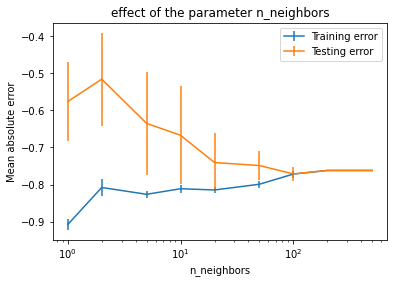

In [15]:
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]

from sklearn.model_selection import validation_curve
import numpy as np

train_scores, test_scores = validation_curve(
    pipeline, data, target, param_name="kneighborsclassifier__n_neighbors", param_range=param_range,
    cv=5)
train_errors, test_errors = -train_scores, -test_scores


import matplotlib.pyplot as plt

plt.errorbar(param_range, train_errors.mean(axis=1),yerr=train_scores.std(axis=1), label="Training error")
plt.errorbar(param_range, test_errors.mean(axis=1),yerr=test_scores.std(axis=1), label="Testing error")
plt.legend()

plt.xscale("log")

plt.xlabel("n_neighbors")
plt.ylabel("Mean absolute error")
_ = plt.title("effect of the parameter n_neighbors")

# Question 8
Select the true affirmations stated below:

- a) The model overfits for a range of `n_neighbors` values between 1 to 10
- b) The model overfits for a range of `n_neighbors` values between 10 to 100
- c) The model overfits for a range of `n_neighbors` values between 100 to 500


# Question 9
Select the true affirmations stated below:

- a) The model best generalizes for a range of `n_neighbors` values between 1 to 10
- b) The model best generalizes for a range of `n_neighbors` values between 10 to 100
- c) The model best generalizes for a range of `n_neighbors` values between 100 to 500
